In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
file_path = 'E:/UNCC/UNCC ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [224]:
# Converting the strings to values

list1 =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
list2 = ['furnishingstatus']

# Defining the map function
def map1(x):
    return x.map({'yes': 1, 'no': 0})

def map2(x):
    return x.map({'furnished': 1, 'semi-furnished': 0})
    
sample[list1] = sample[list1].apply(map1)
sample[list2] = sample[list2].apply(map2)

sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0


In [225]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Normalizing every values except 'price' which is output and parameters with binary values ('yes/no' and 'furnished/semi-furnished').
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sample[num_vars] = scaler.fit_transform(sample[num_vars])
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.0


In [226]:
sample1 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]
sample1.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1


In [227]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample1, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [228]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()

train_losses = []
val_losses = []

In [229]:
# Setting the values for gradient desent calculation.
learning_rate = 0.1
iterations = 100
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [230]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [1740609.70583782 1482669.09879606 1090701.51085653 1662741.91394603
 1328243.11604338  905871.99087791  542773.93931942  315309.76016668
  716290.73368893 1055627.50314581 1057223.44544318  665297.15430614]


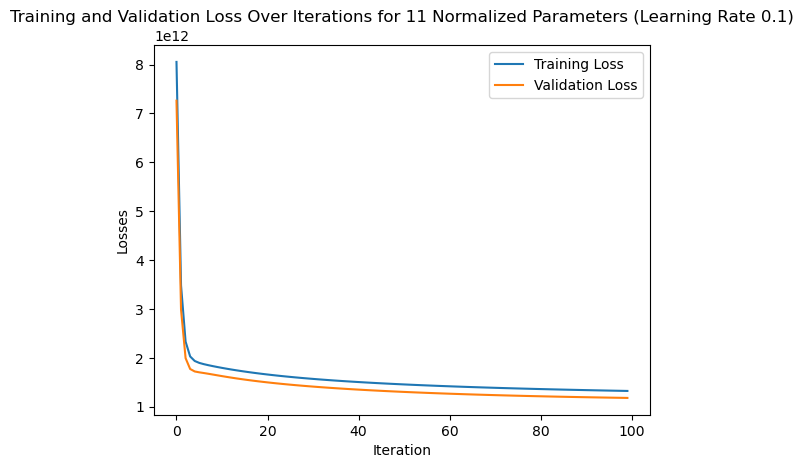

In [231]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 11 Normalized Parameters (Learning Rate 0.1)")
plt.show()

In [232]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [233]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [1863992.13991571  613650.99345943  829043.71742366  422900.40696979
  762894.34662325 1578689.41727844  424302.79882541  608827.84563237
  197833.35511472  867777.31143402  631717.37239655  553269.56076507]


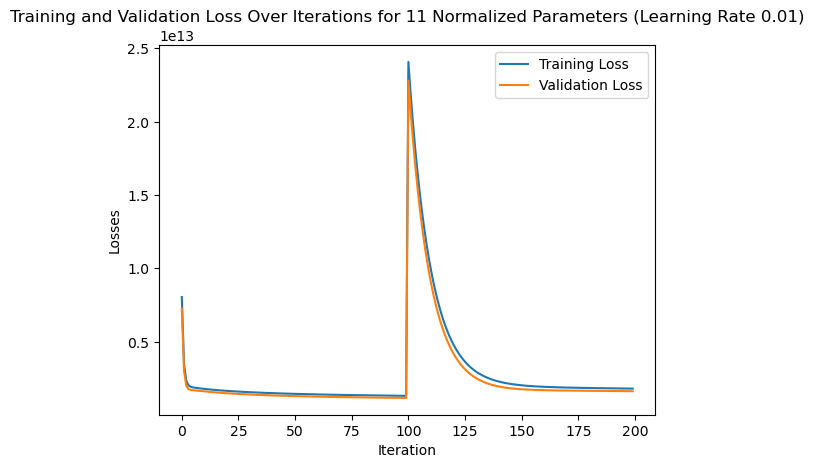

In [234]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 11 Normalized Parameters (Learning Rate 0.01)")
plt.show()

In [235]:
from sklearn.preprocessing import StandardScaler

# Normalizing every values except 'price' which is output and parameters with binary values ('yes/no' and 'furnished/semi-furnished').
scaler_s = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sample[num_vars] = scaler_s.fit_transform(sample[num_vars])
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.0


In [236]:
sample2 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea']]
sample2.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1


In [237]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample2, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [238]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()

train_losses = []
val_losses = []

In [239]:
# Setting the values for gradient desent calculation.
learning_rate = 0.1
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [240]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [3198128.76613565  487403.44364804   87296.46999016  594542.26098823
  338485.39706433 1083434.44367148  360801.70022318  348892.31969602
  647530.13971974  902334.68013562  207420.86053512  561734.2974645 ]


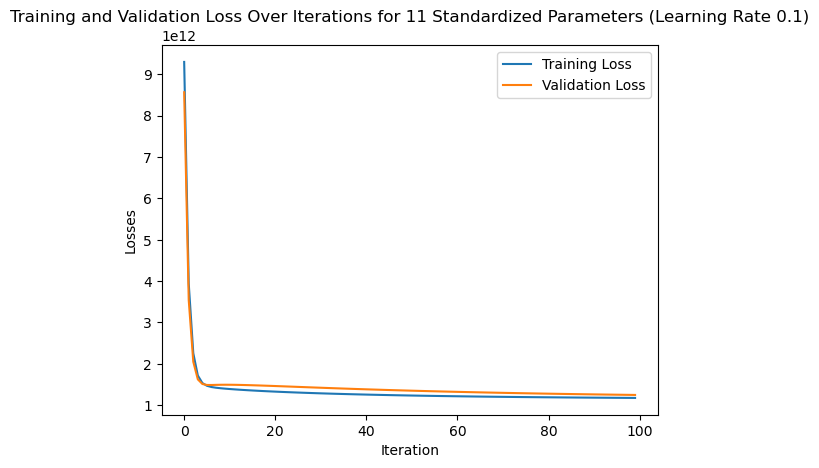

In [241]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 11 Standardized Parameters (Learning Rate 0.1)")
plt.show()

In [242]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [243]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [2318792.5726053   380086.079196    124225.93064895  538324.13845732
  357165.13925169 1855910.4179919   413219.98140046  708537.1919425
  203413.54485782  837215.85963535  239927.39376252  569447.56181956]


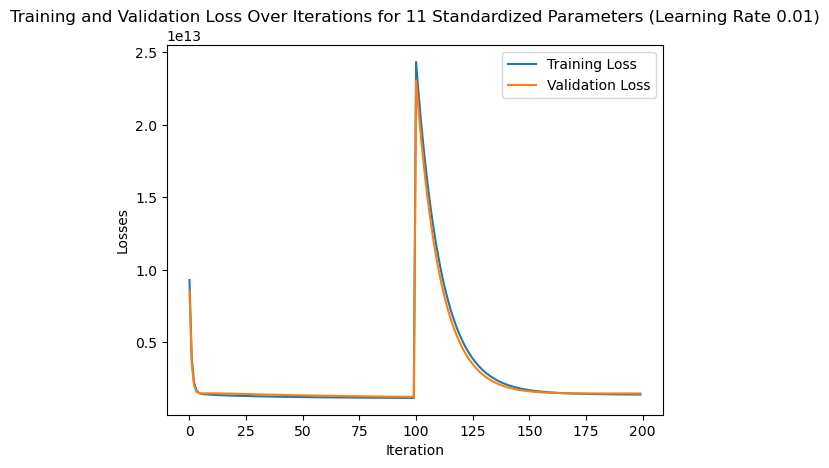

In [244]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 11 Standardized Parameters (Learning Rate 0.01)")
plt.show()